In [5]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
import mglearn
from sklearn.preprocessing import StandardScaler

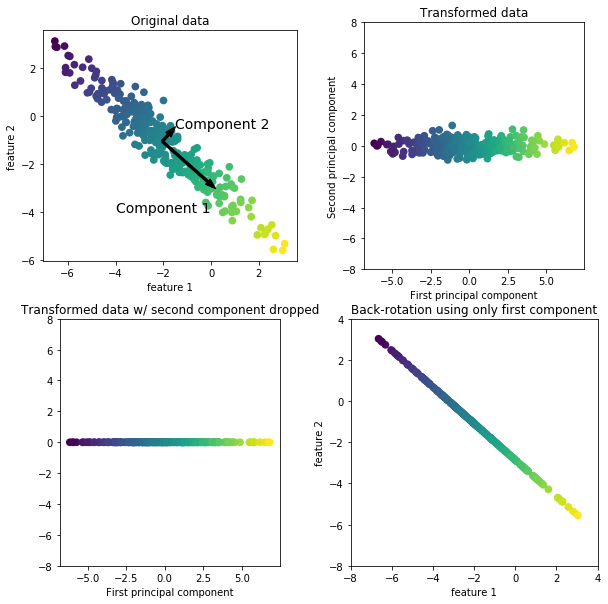

In [2]:
mglearn.plots.plot_pca_illustration()

各特徴量ヒストグラム  どの特徴量が有用か

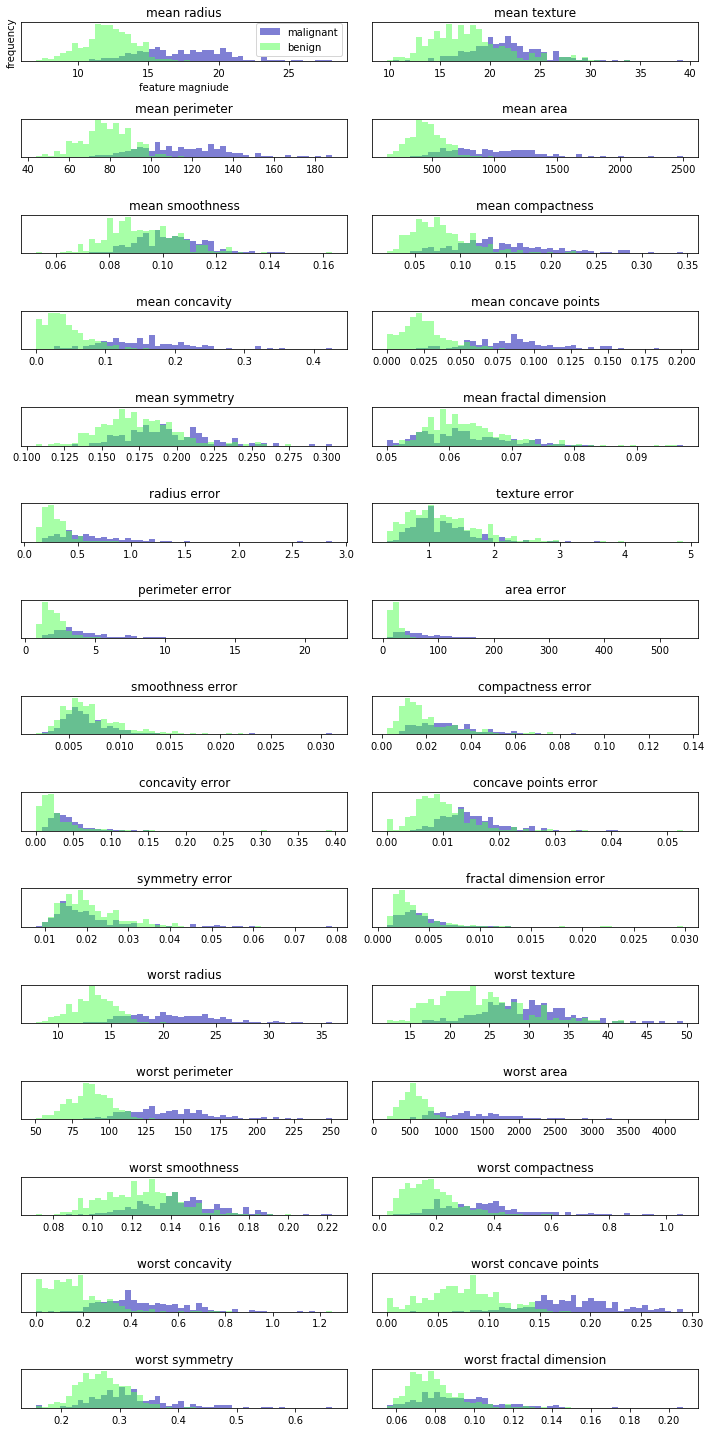

In [16]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature magniude")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
cancer = load_breast_cancer()

#PCA適用前にスケール変換
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_raw = cancer.data

#第二主成分まで取得
pca = PCA(n_components=2)
pca.fit(X_scaled)


X_pca = pca.transform(X_scaled)
X_rawpca = pca.transform(X_raw)
print("original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

original shape: (569, 30)
Reduced shape: (569, 2)


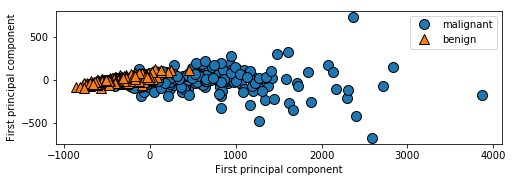

In [23]:
#変換せずにPCA適用したデータ
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_rawpca[:, 0], X_rawpca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("First principal component")

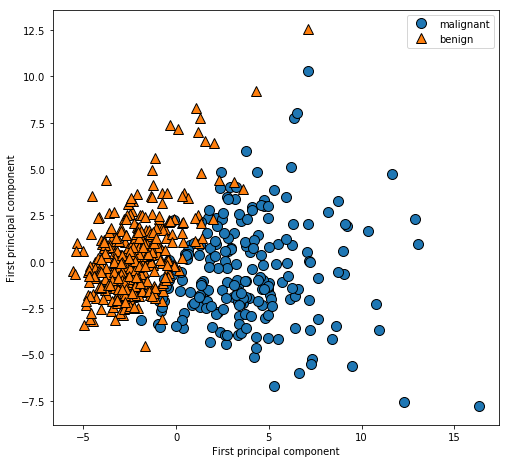

In [26]:
#変換してPCA適用したデータ
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("First principal component")

In [28]:
#componentsの行が一つの主成分、重要度によってソートされている。列はPCA変換する前の特徴量に対応。
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


ヒートマップで可視化

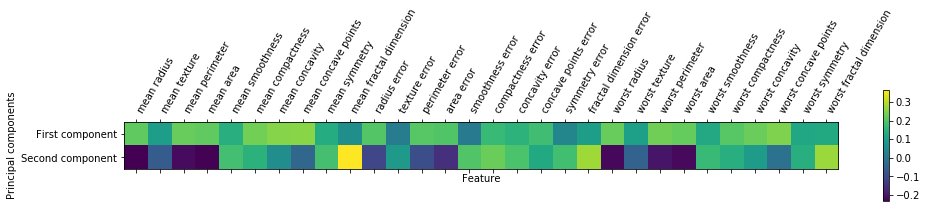

In [29]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

62人3023枚の87×65ピクセルの画像

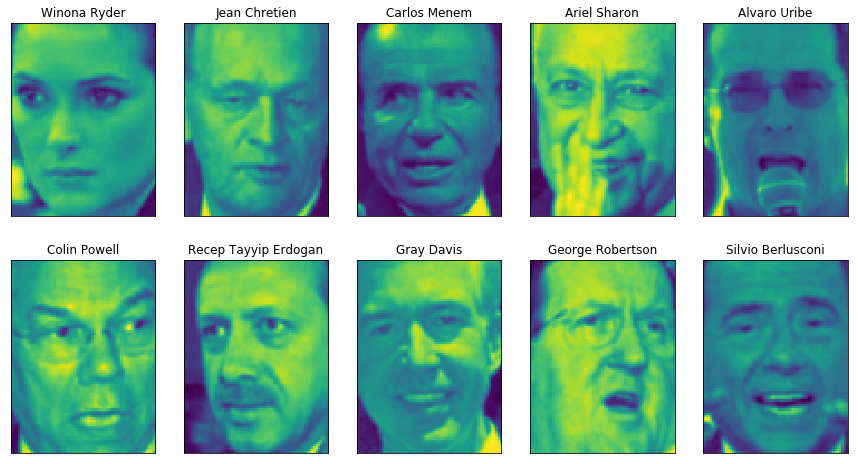

In [31]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [12]:
print("people.image.shape:{}".format(people.images.shape))
print("number of class:{}".format(len(people.target_names)))

people.image.shape:(3023, 87, 65)
number of class:62


誰の画像が何枚あるかカウント

In [13]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

各人の画像を最大50枚に制限

In [15]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

#0-255で表現されているグレースケールを0-1に変換
X_people = X_people / 255.

In [37]:
X_people.shape

(2063, 5655)

K近傍法を用いた分類

In [38]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


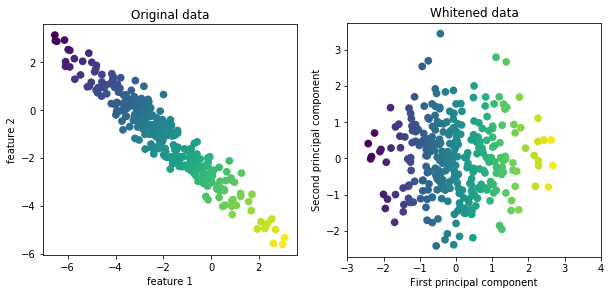

In [42]:
mglearn.plots.plot_pca_whitening()

PCAによる変換を行った後にk近傍法

In [45]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)


In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [47]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


それぞれの主成分がどんな特徴を捉えているか

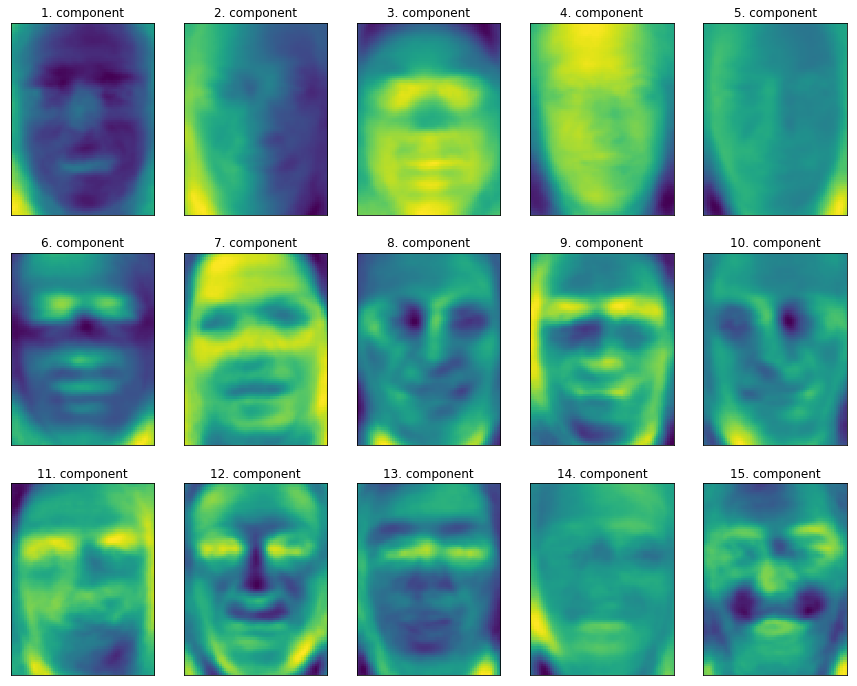

In [48]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.535948, ...,  0.243137],
       ..., 
       [ 0.043137, ...,  0.596078]], dtype=float32), 
array([[ 0.237908, ...,  0.269281],
       ..., 
       [ 0.4     , ...,  0.254902]], dtype=float32))
_______________________________________________________pca_faces - 26.9s, 0.4min


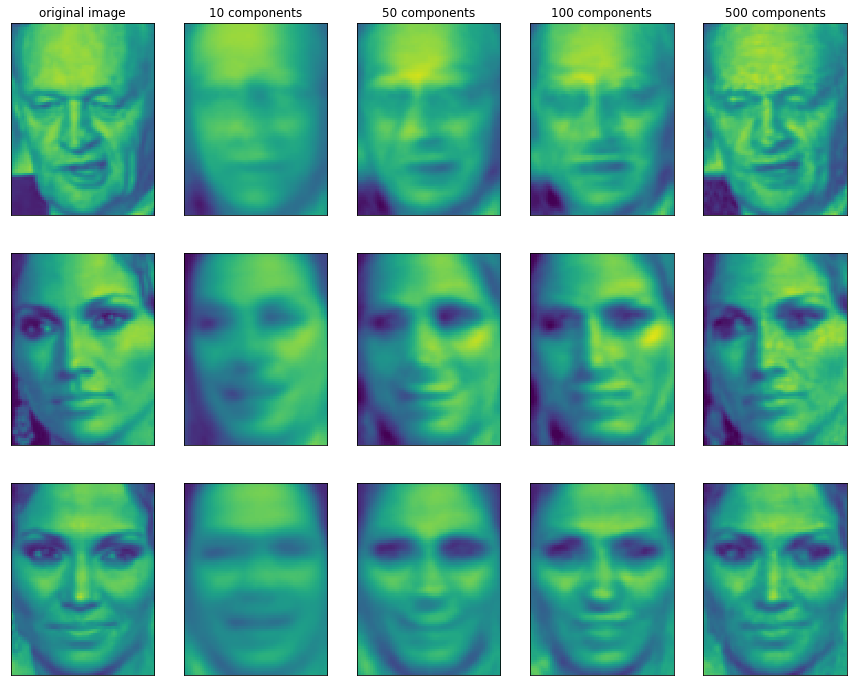

In [52]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

画像の第一第二主成分の散布図

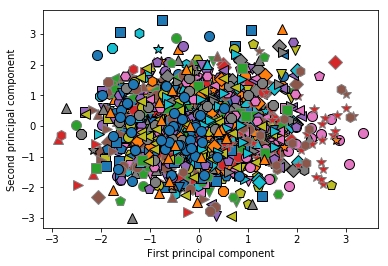

In [51]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")